In [1]:
import nltk
import numpy as np
import string
import matplotlib.pyplot as plt
from nltk.tokenize import word_tokenize
from nltk.corpus import PlaintextCorpusReader
from nltk.text import Text
import re
from nltk.probability import FreqDist
from nltk.corpus import stopwords
from collections import Counter
from wordcloud import WordCloud
from matplotlib.colors import LinearSegmentedColormap
from PIL import Image

In text mining it can be useful to extract words that have a particular part of speech (POS) such as a noun or a verb. For example extracting all proper nouns can give use names and locations. This is done using a POS-tagger. The POS-tag of a word is a label of the word indicating its part of speech as well as grammatical categories such as tense, number (plural/singular) and case. POS tagging is the process of automatically determining the POS-tags of the tokens in a corpus.

In this lesson, we will use NLTK’s averaged_perceptron_tagger as the POS-tagger. It uses the perceptron algorithm to predict which POS-tag is most likely given the word. We need to download the tagger in order to use it.

The POS-tagger outputs tokens tagged with their POS-tag. It uses the Penn Treebank POS tagset which is widely used for POS-tagging text.

POS-tagging text is very useful when analysing a corpus or document and will allow us to do more indepth analysis and visualisations. In order to pos-tag using NLTK, you also have to import pos_tag from the tag package.

We are going to use the text from the US Presidential Inaugaral speeches. This is a data set that we can download from NLTK.

In [4]:
nltk.download('averaged_perceptron_tagger')

from nltk.tag import pos_tag

nltk.download('inaugural')

from nltk.corpus import inaugural

[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     C:\Users\DIPTO\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping taggers\averaged_perceptron_tagger.zip.
[nltk_data] Downloading package inaugural to
[nltk_data]     C:\Users\DIPTO\AppData\Roaming\nltk_data...
[nltk_data]   Package inaugural is already up-to-date!


In [8]:
inaugural_tokens=inaugural.words()
inaugural_tokens

['Fellow', '-', 'Citizens', 'of', 'the', 'Senate', ...]

We can look at the tokens from the last inaugural, the one made by President Trump, by looking at the last member of the list of speeches using the fileids() method.

In [7]:
inaugural_tokens_trump = inaugural.words(inaugural.fileids()[0:-1])
inaugural_tokens_trump

['Fellow', '-', 'Citizens', 'of', 'the', 'Senate', ...]

We can assign POS-tags to all speeches using NLTK’s pos_tag() method and view the first 20:

In [9]:
tagged_inaugural_tokens = nltk.pos_tag(inaugural_tokens)
tagged_inaugural_tokens[:20]

[('Fellow', 'NNP'),
 ('-', ':'),
 ('Citizens', 'NNS'),
 ('of', 'IN'),
 ('the', 'DT'),
 ('Senate', 'NNP'),
 ('and', 'CC'),
 ('of', 'IN'),
 ('the', 'DT'),
 ('House', 'NNP'),
 ('of', 'IN'),
 ('Representatives', 'NNPS'),
 (':', ':'),
 ('Among', 'IN'),
 ('the', 'DT'),
 ('vicissitudes', 'NNS'),
 ('incident', 'NN'),
 ('to', 'TO'),
 ('life', 'NN'),
 ('no', 'DT')]

We can then set up lists to hold specific parts of speech such as nouns. Firstly we set up an empty list and the we search for the nouns, NN singular and NNS plural. We can then print the first 20:

In [10]:
nouns = [] 
nouns = [word for (word, pos) in tagged_inaugural_tokens if (pos == 'NN' or pos == 'NNS')] 
nouns[:20]

['Citizens',
 'vicissitudes',
 'incident',
 'life',
 'event',
 'anxieties',
 'notification',
 'order',
 'day',
 'month',
 'hand',
 'Country',
 'voice',
 'veneration',
 'love',
 'retreat',
 'predilection',
 'flattering',
 'hopes',
 'decision']

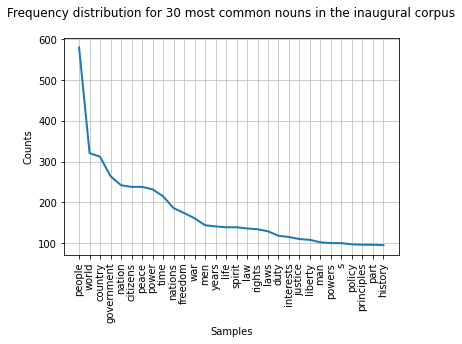

<AxesSubplot:title={'center':'Frequency distribution for 30 most common nouns in the inaugural corpus\n'}, xlabel='Samples', ylabel='Counts'>

In [12]:
from nltk.probability import FreqDist
fdist = FreqDist(nouns)
fdist.plot(30,title='Frequency distribution for 30 most common nouns in the inaugural corpus\n')

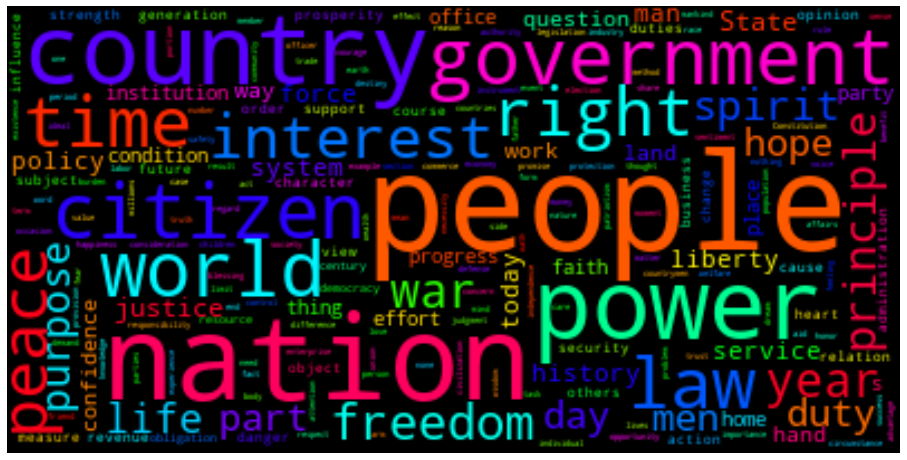

In [13]:
cloud = WordCloud(max_font_size=60,colormap="hsv").generate(' '.join(nouns))

plt.rcParams["figure.figsize"] = (16,12)
plt.imshow(cloud, interpolation='bilinear')
plt.axis('off')
plt.show()


##### Task 1: Change the code above to create a frequency list for the most common adjectives in the inaugural corpus. The POS-tag for adjective ‘JJ’.

In [14]:
adjectives = []
adjectives = [word for (word, pos) in tagged_inaugural_tokens if (pos == 'JJ')]
adjectives[:20]

['14th',
 'present',
 'immutable',
 'necessary',
 'dear',
 'frequent',
 'gradual',
 'other',
 'sufficient',
 'experienced',
 'distrustful',
 'inferior',
 'unpracticed',
 'civil',
 'conscious',
 'own',
 'faithful',
 'much',
 'grateful',
 'former']

##### Task 2: Plot a word cloud of the adjectives in the inaugural corpus.

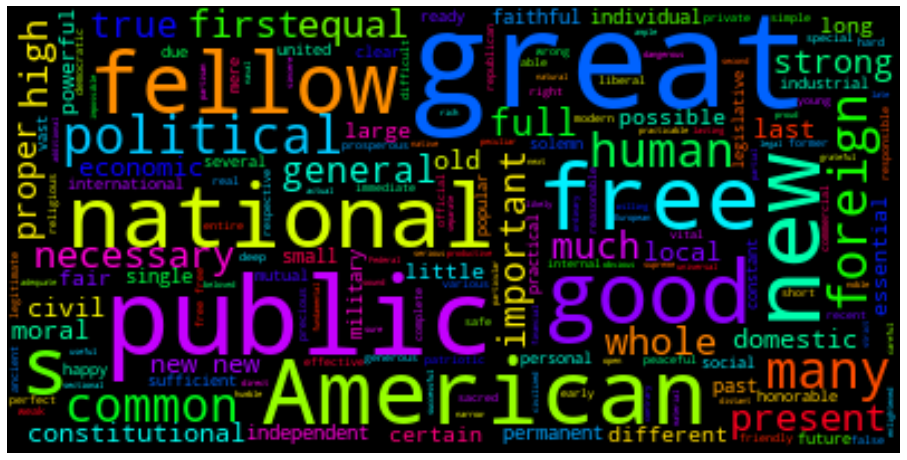

In [15]:
cloud = WordCloud(max_font_size=60,colormap="hsv").generate(' '.join(adjectives))

plt.rcParams["figure.figsize"] = (16,12)
plt.imshow(cloud, interpolation='bilinear')
plt.axis('off')
plt.show()

##### Task 3: You can do the same for another POS-tag. For the full list of Penn Treebank POS tags see here --> https://www.ling.upenn.edu/courses/Fall_2003/ling001/penn_treebank_pos.html.

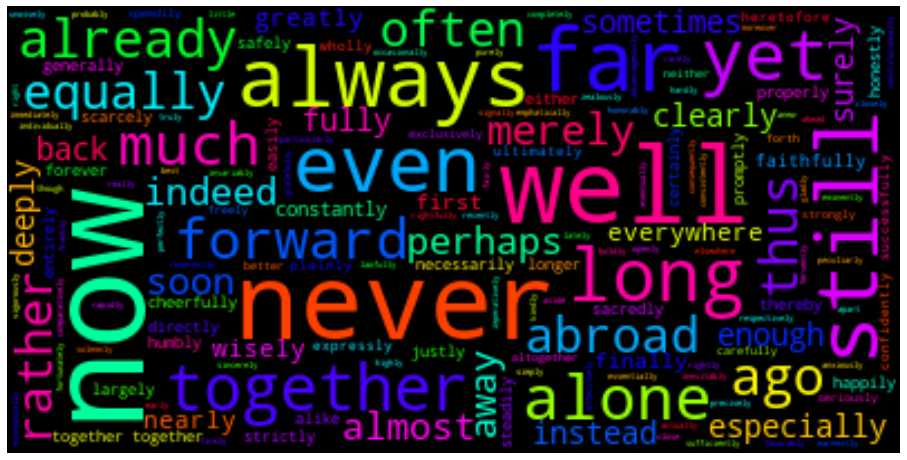

In [16]:
adverbs = []
adverbs = [word for (word, pos) in tagged_inaugural_tokens if (pos == 'RB')]
adverbs[:20]

cloud = WordCloud(max_font_size=60,colormap="hsv").generate(' '.join(adverbs))

plt.rcParams["figure.figsize"] = (16,12)
plt.imshow(cloud, interpolation='bilinear')
plt.axis('off')
plt.show()